In [29]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np

In [30]:
game_filenames = [r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2009.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2010.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2011.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2012.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2013.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2014.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2015.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2016.csv',
                  r'C:\\Users\mendo\Desktop\Retro Data\game_data\games2017.csv']

game_headers = ['game_id', 'date', 'game_number', 'weekday', 'start_time', 'dh_used', 'day_night','visiting_team',
                'home_team', 'game_site', 'vis_starting_pitcher', 'home_starting_pitcher','home_plate_ump','base1_ump',
                'base2_ump', 'base3_ump','lf_ump', 'rf_ump', 'attendance','ps_scorer', 'translator', 'inputter',
                'input_time', 'edit_time', 'how_scored', 'pitches_entered', 'temperature', 'wind_dir', 'wind_speed',
                'field_cond','precipitation','sky', 'duration', 'total_innings', 'vis_final', 'home_final', 'vis_hits', 'home_hits',
                'vis_errors','home_errors','vis_lob', 'home_lob', 'winning_pitcher', 'losing_pitcher', 'save', 'gw_rbi', 
                'vis_batter1', 'vis_batter1_pos', 'vis_batter2', 'vis_batter2_pos', 'vis_batter3', 'vis_batter3_pos',
                'vis_batter4', 'vis_batter4_pos', 'vis_batter5', 'vis_batter5_pos', 'vis_batter6', 'vis_batter6_pos',
                'vis_batter7', 'vis_batter7_pos', 'vis_batter8', 'vis_batter8_pos', 'vis_batter9', 'vis_batter9_pos',
                'home_batter1', 'home_batter1_pos', 'home_batter2', 'home_batter2_pos', 'home_batter3', 'home_batter3_pos',
                'home_batter4', 'home_batter4_pos', 'home_batter5', 'home_batter5_pos', 'home_batter6', 'home_batter6_pos', 
                'home_batter7', 'home_batter7_pos', 'home_batter8', 'home_batter8_pos', 'home_batter9', 'home_batter9_pos',
                'vis_finishing_pitcher', 'home_finishing_pitcher']

game_data = []
for filename in game_filenames:
    if not game_data:
        all_games = pd.DataFrame(pd.read_csv(filename, low_memory=False, 
                        header=0, names=game_headers, index_col=False))
        game_data = [0]
    else:
        all_games_tmp = pd.DataFrame(pd.read_csv(filename, low_memory=False, 
                        header=0, names=game_headers, index_col=False))
        all_games = all_games.append(all_games_tmp)
        del(all_games_tmp)
del(game_data)

teams_match = {'ANA':'LAA', 'ARI':'ARI', 'ATL':'ATL', 'BAL':'BAL', 'BOS':'BOS', 'CHA':'CWS', 'CHN':'CHC', 'CIN':'CIN',
               'CLE':'CLE','COL':'COL', 'DET':'DET', 'FLO':'MIA', 'HOU':'HOU', 'KCA':'KC', 'LAN':'LAD','MIA':'MIA', 
               'MIL':'MIL','MIN':'MIN', 'NYA':'NYY', 'NYN':'NYM', 'OAK':'OAK', 'PHI':'PHI','PIT':'PIT', 'SDN':'SD', 
               'SEA':'SEA','SFN':'SF', 'SLN':'STL', 'TBA':'TB', 'TEX':'TEX', 'TOR':'TOR', 'WAS':'WSH'}

all_games['date'] = pd.to_datetime(all_games['game_id'].str[3:11], format='%Y-%m-%d')
all_games['odds_matchup'] = (all_games['date'].astype(str) + '-' + all_games['home_team'].map(teams_match)).astype(str) + '-' + (all_games['visiting_team'].map(teams_match)).astype(str)
all_games['season'] = all_games['odds_matchup'].str[:4]

In [31]:
all_games = all_games[['season', 'game_id', 'odds_matchup', 'date', 'home_final', 'vis_final','home_team', 'visiting_team']].sort_values('date')

In [32]:
winner = []
loser = []
win_runs = []
loser_runs = []
winner_hl = []

for index, row in all_games.iterrows():
    if row['home_final'] > row['vis_final']:
        w = row['home_team']
        l = row['visiting_team']
        wr = row['home_final']
        lr = row['vis_final']
        win = 'H'
    else:
        w = row['visiting_team']
        l = row['home_team']
        wr = row['vis_final']
        lr = row['home_final']
        win = 'V'
    winner.append(w)
    loser.append(l)
    win_runs.append(wr)
    loser_runs.append(lr)
    winner_hl.append(win)

all_games['winning_team'] = winner
all_games['losing_team'] = loser
all_games['winning_runs'] = win_runs
all_games['losing_runs'] = loser_runs
all_games['winner_hl'] = winner_hl

In [33]:
all_games['home_season'] = all_games['home_team'] + '-' + all_games['season'].astype(str)
all_games['vis_season'] = all_games['visiting_team'] + '-' + all_games['season'].astype(str)

In [34]:
home_win = []
home_loss = []
vis_win = []
vis_loss = []
for row in all_games['winner_hl']:
    if row == 'H':
        hw = 1
        hl = 0
        vw = 0
        vl = 1
    else:
        hw = 0
        hl = 1
        vw = 1
        vl = 0
    home_win.append(hw)
    home_loss.append(hl)
    vis_win.append(vw)
    vis_loss.append(vl)

In [35]:
all_games['home_win'] = home_win
all_games['home_loss'] = home_loss
all_games['vis_win'] = vis_win
all_games['vis_loss'] = vis_loss
all_games['games_played'] = 1

all_games['home_win_c'] = all_games.groupby('home_season')['home_win'].cumsum() - all_games['home_win']
all_games['home_loss_c'] = all_games.groupby('home_season')['home_loss'].cumsum() - all_games['home_loss']
all_games['home_gp'] = all_games.groupby('home_season')['games_played'].cumsum() - all_games['games_played']

all_games['vis_win_c'] = all_games.groupby('vis_season')['vis_win'].cumsum() - all_games['vis_win']
all_games['vis_loss_c'] = all_games.groupby('vis_season')['home_loss'].cumsum() - all_games['vis_loss']
all_games['vis_gp'] = all_games.groupby('vis_season')['games_played'].cumsum() - all_games['games_played']

In [36]:
all_games['home_runs_scored'] = all_games.groupby('home_season')['home_final'].cumsum() - all_games['home_final']
all_games['home_runs_allowed'] = all_games.groupby('home_season')['vis_final'].cumsum() - all_games['vis_final']

all_games['vis_runs_scored'] = all_games.groupby('vis_season')['vis_final'].cumsum() - all_games['vis_final']
all_games['vis_runs_allowed'] = all_games.groupby('vis_season')['home_final'].cumsum() - all_games['home_final']

all_games['home_p_win_percentage'] = all_games['home_runs_scored']**1.83 / (all_games['home_runs_scored']**1.83 + all_games['home_runs_allowed']**1.83)
all_games['vis_p_win_percentage'] = all_games['vis_runs_scored']**1.83 / (all_games['vis_runs_scored']**1.83 + all_games['vis_runs_allowed']**1.83)

all_games['home_x_wins'] = (all_games['home_p_win_percentage'] * all_games['home_gp']).round(0)
all_games['vis_x_wins'] = (all_games['vis_p_win_percentage'] * all_games['vis_gp']).round(0)

all_games['home_x_win_diff'] = all_games['home_x_wins'] - all_games['home_win_c']
all_games['vis_x_win_diff'] = all_games['vis_x_wins'] - all_games['vis_win_c']

In [37]:
all_games.columns.values

array(['season', 'game_id', 'odds_matchup', 'date', 'home_final',
       'vis_final', 'home_team', 'visiting_team', 'winning_team',
       'losing_team', 'winning_runs', 'losing_runs', 'winner_hl',
       'home_season', 'vis_season', 'home_win', 'home_loss', 'vis_win',
       'vis_loss', 'games_played', 'home_win_c', 'home_loss_c', 'home_gp',
       'vis_win_c', 'vis_loss_c', 'vis_gp', 'home_runs_scored',
       'home_runs_allowed', 'vis_runs_scored', 'vis_runs_allowed',
       'home_p_win_percentage', 'vis_p_win_percentage', 'home_x_wins',
       'vis_x_wins', 'home_x_win_diff', 'vis_x_win_diff'], dtype=object)

In [38]:
all_games1 = all_games[['game_id', 'home_team', 'visiting_team', 'home_win_c', 'home_loss_c',
                       'vis_win_c', 'vis_loss_c', 'home_p_win_percentage', 'vis_p_win_percentage',
                       'home_x_wins','vis_x_wins', 'home_x_win_diff', 'vis_x_win_diff']]
all_games1['home_id'] = all_games1['game_id'] + '-' + all_games1['home_team']
all_games1['vis_id'] = all_games1['game_id'] + '-' + all_games1['visiting_team']
all_games1

C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,game_id,home_team,visiting_team,home_win_c,home_loss_c,vis_win_c,vis_loss_c,home_p_win_percentage,vis_p_win_percentage,home_x_wins,vis_x_wins,home_x_win_diff,vis_x_win_diff,home_id,vis_id
1619,PHI200904050,PHI,ATL,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,PHI200904050-PHI,PHI200904050-ATL
80,ARI200904060,ARI,COL,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,ARI200904060-ARI,ARI200904060-COL
2186,TEX200904060,TEX,CLE,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,TEX200904060-TEX,TEX200904060-CLE
889,FLO200904060,FLO,WAS,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,FLO200904060-FLO,FLO200904060-WAS
565,CIN200904060,CIN,NYN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,CIN200904060-CIN,CIN200904060-NYN
2267,TOR200904060,TOR,DET,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,TOR200904060-TOR,TOR200904060-DET
1294,MIN200904060,MIN,SEA,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,MIN200904060-MIN,MIN200904060-SEA
970,HOU200904060,HOU,CHN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,HOU200904060-HOU,HOU200904060-CHN
242,BAL200904060,BAL,NYA,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,BAL200904060-BAL,BAL200904060-NYA
1781,SDN200904060,SDN,LAN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,SDN200904060-SDN,SDN200904060-LAN


In [39]:
pwl = all_games[['game_id', 'date', 'odds_matchup', 'season', 'winning_team', 'losing_team', 'winning_runs', 'losing_runs']]
pwl['winner'] = pwl['winning_team'] + '-' + pwl['winning_runs'].astype(str)
pwl['loser'] =  pwl['losing_team'] + '-' + pwl['losing_runs'].astype(str)
pwl_w = pwl[['game_id', 'winner']]
pwl_l = pwl[['game_id', 'loser']]

C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
h = pwl[['date', 'season', 'game_id', 'winning_team']]
h.columns = ['date', 'season', 'game_id', 'team']
v = pwl[['date', 'season', 'game_id', 'losing_team']]
v.columns = ['date', 'season', 'game_id', 'team']

records = h.append(v).sort_values(['date', 'game_id'])
records = records.merge(pwl_w, how='left', on='game_id').merge(pwl_l, how='left', on='game_id')
records['win_team'] = records['winner'].str[:3].astype(str)
records['team'] = records['team'].astype(str)
records = records.drop_duplicates()

records['win_runs'] = records['winner'].str[4:]
records['lose_runs'] = records['loser'].str[4:]

In [41]:
win = []
loss = []
runs_scored = []
runs_allowed = []

for index, row in records.iterrows():
    if row['team'] == row['win_team']:
        wt = 1
        lt = 0
        rs = row['win_runs']
        ra = row['lose_runs']
    else:
        wt = 0
        lt = 1
        rs = row['lose_runs']
        ra = row['win_runs']
    win.append(wt)
    loss.append(lt)
    runs_scored.append(rs)
    runs_allowed.append(ra)

records['win'] = win
records['loss'] = loss
records['runs_scored'] = runs_scored
records['runs_allowed'] = runs_allowed

In [42]:
ht = all_games[['game_id', 'home_team']].drop_duplicates()
records = records.merge(ht, how='left', on='game_id')

In [43]:
records['home_'] = records['team'] == records['home_team']
records

,date,season,game_id,team,winner,loser,win_team,win_runs,lose_runs,win,loss,runs_scored,runs_allowed,home_team,home_
0,2009-04-05,2009,PHI200904050,ATL,ATL-4,PHI-1,ATL,4,1,1,0,4,1,PHI,False
1,2009-04-05,2009,PHI200904050,PHI,ATL-4,PHI-1,ATL,4,1,0,1,1,4,PHI,True
2,2009-04-06,2009,ARI200904060,ARI,ARI-9,COL-8,ARI,9,8,1,0,9,8,ARI,True
3,2009-04-06,2009,ARI200904060,COL,ARI-9,COL-8,ARI,9,8,0,1,8,9,ARI,False
4,2009-04-06,2009,BAL200904060,BAL,BAL-10,NYA-5,BAL,10,5,1,0,10,5,BAL,True
5,2009-04-06,2009,BAL200904060,NYA,BAL-10,NYA-5,BAL,10,5,0,1,5,10,BAL,False
6,2009-04-06,2009,CIN200904060,NYN,NYN-2,CIN-1,NYN,2,1,1,0,2,1,CIN,False
7,2009-04-06,2009,CIN200904060,CIN,NYN-2,CIN-1,NYN,2,1,0,1,1,2,CIN,True
8,2009-04-06,2009,FLO200904060,FLO,FLO-12,WAS-6,FLO,12,6,1,0,12,6,FLO,True
9,2009-04-06,2009,FLO200904060,WAS,FLO-12,WAS-6,FLO,12,6,0,1,6,12,FLO,False


In [44]:
records = records[['date', 'season', 'game_id', 'team', 'win', 'loss', 'runs_scored', 'runs_allowed', 'home_']]
records['team'] = records['team'].map(teams_match)
records['season_team'] = records['season'] + '-' + records['team']

C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
records['r_wins'] = records.groupby('season_team')['win'].cumsum() - records['win']
records['r_losses'] = records.groupby('season_team')['loss'].cumsum() - records['loss']

records['runs_scored'] = records['runs_scored'].astype(int)
records['runs_allowed'] = records['runs_allowed'].astype(int)
records['r_runs_scored'] = records.groupby('season_team')['runs_scored'].cumsum() - records['runs_scored']
records['r_runs_allowed'] = records.groupby('season_team')['runs_allowed'].cumsum() - records['runs_allowed']

C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [46]:
records['games'] = 1
records['games_played'] = records.groupby('season_team')['games'].cumsum() - records['games']
records['win_percentage'] = records['r_wins'] / records['games_played']
records['p_win_percentage'] = records['r_runs_scored']**1.83 / (records['r_runs_scored']**1.83 + records['r_runs_allowed']**1.83)

records['expected_wins'] = (records['p_win_percentage'] * records['games_played']).round(0)
records['expected_losses'] = ((1 - records['p_win_percentage']) * records['games_played']).round(0)
records['win_difference'] = records['r_wins'] - records['expected_wins']

In [47]:
records = records[['game_id', 'team', 'r_wins', 'r_losses',
       'r_runs_scored', 'r_runs_allowed', 'games', 'games_played',
       'win_percentage', 'p_win_percentage', 'expected_wins',
       'expected_losses', 'win_difference', 'home_', 'season']]
records['team_id'] = records['game_id'] + '-' + records['team']
records

,game_id,team,r_wins,r_losses,r_runs_scored,r_runs_allowed,games,games_played,win_percentage,p_win_percentage,expected_wins,expected_losses,win_difference,home_,season,team_id
0,PHI200904050,ATL,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,False,2009,PHI200904050-ATL
1,PHI200904050,PHI,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,True,2009,PHI200904050-PHI
2,ARI200904060,ARI,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,True,2009,ARI200904060-ARI
3,ARI200904060,COL,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,False,2009,ARI200904060-COL
4,BAL200904060,BAL,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,True,2009,BAL200904060-BAL
5,BAL200904060,NYY,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,False,2009,BAL200904060-NYY
6,CIN200904060,NYM,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,False,2009,CIN200904060-NYM
7,CIN200904060,CIN,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,True,2009,CIN200904060-CIN
8,FLO200904060,MIA,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,True,2009,FLO200904060-MIA
9,FLO200904060,WSH,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,False,2009,FLO200904060-WSH


In [48]:
h_records = records[records['home_']==True]
v_records = records[records['home_']==False]

h_records.columns = ['home_' + str(col) for col in h_records.columns]
v_records.columns = ['vis_' + str(col) for col in v_records.columns]

In [49]:
all_games2 = all_games1.merge(h_records, how='left', left_on='game_id', right_on='home_game_id')
all_games3 = all_games2.merge(v_records, how='left', left_on='game_id', right_on='vis_game_id')

In [50]:
all_games3 = all_games3[['game_id', 'home_team_x', 'visiting_team', 'home_win_c',
                         'home_loss_c', 'vis_win_c', 'vis_loss_c', 'home_p_win_percentage_x',
                         'vis_p_win_percentage_x', 'home_x_wins', 'vis_x_wins',
                         'home_x_win_diff', 'vis_x_win_diff', 'home_r_wins', 'home_r_losses',
                         'home_r_runs_scored', 'home_r_runs_allowed', 'home_games',
                         'home_games_played', 'home_win_percentage','home_p_win_percentage_y',
                         'home_expected_wins','home_expected_losses', 'home_win_difference',
                         'vis_r_wins','vis_r_losses', 'vis_r_runs_scored', 'vis_r_runs_allowed',
                         'vis_games', 'vis_games_played', 'vis_win_percentage',
                         'vis_p_win_percentage_y', 'vis_expected_wins','vis_expected_losses', 
                         'vis_win_difference']]

In [51]:
# all_games3.to_csv(r'C:\\Users\\mendo\\Desktop\\pwl.csv', sep=',')

In [52]:
records['season_team'] = records['season'] + '-' + records['team']

division_dict = {'2009-ATL':'NL-East', '2009-PHI':'NL-East', '2009-ARI':'NL-West', '2009-COL':'NL-West', '2009-BAL':'AL-East',
       '2009-NYY':'AL-East', '2009-NYM':'NL-East', '2009-CIN':'NL-Central', '2009-MIA':'NL-East', '2009-WSH':'NL-East',
       '2009-CHC':'NL-Central', '2009-HOU':'NL-Central', '2009-SEA':'AL-West', '2009-MIN':'AL-Central', '2009-LAD':'NL-West',
       '2009-SD':'NL-West', '2009-PIT':'NL-Central', '2009-STL':'NL-Central', '2009-TEX':'AL-West', '2009-CLE':'AL-Central',
       '2009-TOR':'AL-East', '2009-DET':'AL-Central', '2009-OAK':'AL-West', '2009-LAA':'AL-West', '2009-BOS':'AL-East',
       '2009-TB':'AL-East', '2009-CWS':'AL-Central', '2009-KC':'AL-Central', '2009-SF':'NL-West', '2009-MIL':'NL-Central',
       '2010-BOS':'AL-East', '2010-NYY':'AL-East', '2010-ARI':'NL-West', '2010-SD':'NL-West', '2010-ATL':'NL-East',
       '2010-CHC':'NL-Central', '2010-CWS':'AL-Central', '2010-CLE':'AL-Central', '2010-STL':'NL-Central', '2010-CIN':'NL-Central',
       '2010-SF':'NL-West', '2010-HOU':'NL-Central', '2010-DET':'AL-Central', '2010-KC':'AL-Central', '2010-COL':'NL-West',
       '2010-MIL':'NL-Central', '2010-NYM':'NL-East', '2010-MIA':'NL-East', '2010-SEA':'AL-West', '2010-OAK':'AL-West',
       '2010-PIT':'NL-Central', '2010-LAD':'NL-West', '2010-TEX':'AL-West', '2010-TOR':'AL-East', '2010-PHI':'NL-East',
       '2010-WSH':'NL-East', '2010-MIN':'AL-Central', '2010-LAA':'AL-West', '2010-TB':'AL-East', '2010-BAL':'AL-East',
       '2011-CIN':'NL-Central', '2011-MIL':'NL-Central', '2011-LAA':'AL-West', '2011-KC':'AL-Central', '2011-LAD':'NL-West',
       '2011-SF':'NL-West', '2011-NYY':'AL-East', '2011-DET':'AL-Central', '2011-SD':'NL-West', '2011-STL':'NL-Central',
       '2011-ATL':'NL-East', '2011-WSH':'NL-East', '2011-PIT':'NL-Central', '2011-CHC':'NL-Central', '2011-CWS':'AL-Central',
       '2011-CLE':'AL-Central', '2011-ARI':'NL-West', '2011-COL':'NL-West', '2011-MIA':'NL-East', '2011-NYM':'NL-East',
       '2011-SEA':'AL-West', '2011-OAK':'AL-West', '2011-PHI':'NL-East', '2011-HOU':'NL-Central', '2011-BAL':'AL-East',
       '2011-TB':'AL-East', '2011-TEX':'AL-West', '2011-BOS':'AL-East', '2011-TOR':'AL-East', '2011-MIN':'AL-Central',
       '2012-SEA':'AL-West', '2012-OAK':'AL-West', '2012-STL':'NL-Central', '2012-MIA':'NL-East', '2012-WSH':'NL-East',
       '2012-CHC':'NL-Central', '2012-CIN':'NL-Central', '2012-TOR':'AL-East', '2012-CLE':'AL-Central', '2012-DET':'AL-Central',
       '2012-BOS':'AL-East', '2012-NYM':'NL-East', '2012-ATL':'NL-East', '2012-PHI':'NL-East', '2012-PIT':'NL-Central',
       '2012-LAD':'NL-West', '2012-SD':'NL-West', '2012-ARI':'NL-West', '2012-SF':'NL-West', '2012-BAL':'AL-East',
       '2012-MIN':'AL-Central', '2012-COL':'NL-West', '2012-HOU':'NL-Central', '2012-MIL':'NL-Central', '2012-TB':'AL-East',
       '2012-NYY':'AL-East', '2012-TEX':'AL-West', '2012-CWS':'AL-Central', '2012-KC':'AL-Central', '2012-LAA':'AL-West',
       '2013-HOU':'AL-West', '2013-TEX':'AL-West', '2013-ARI':'NL-West', '2013-STL':'NL-Central', '2013-ATL':'NL-East',
       '2013-PHI':'NL-East', '2013-CWS':'AL-Central', '2013-KC':'AL-Central', '2013-LAA':'AL-West', '2013-CIN':'NL-Central',
       '2013-LAD':'NL-West', '2013-SF':'NL-West', '2013-MIL':'NL-Central', '2013-COL':'NL-West', '2013-DET':'AL-Central',
       '2013-MIN':'AL-Central', '2013-BOS':'AL-East', '2013-NYY':'AL-East', '2013-NYM':'NL-East', '2013-SD':'NL-West',
       '2013-SEA':'AL-West', '2013-OAK':'AL-West', '2013-CHC':'NL-Central', '2013-PIT':'NL-Central', '2013-WSH':'NL-East',
       '2013-MIA':'NL-East', '2013-BAL':'AL-East', '2013-TB':'AL-East', '2013-CLE':'AL-Central', '2013-TOR':'AL-East',
       '2014-LAD':'NL-West', '2014-ARI':'NL-West', '2014-SD':'NL-West', '2014-SF':'NL-West', '2014-BAL':'AL-East',
       '2014-BOS':'AL-East', '2014-CWS':'AL-Central', '2014-MIN':'AL-Central', '2014-STL':'NL-Central', '2014-CIN':'NL-Central',
       '2014-DET':'AL-Central', '2014-KC':'AL-Central', '2014-MIA':'NL-East', '2014-COL':'NL-West', '2014-MIL':'NL-Central',
       '2014-ATL':'NL-East', '2014-WSH':'NL-East', '2014-NYM':'NL-East', '2014-CLE':'AL-Central', '2014-OAK':'AL-West',
       '2014-PIT':'NL-Central', '2014-CHC':'NL-Central', '2014-TB':'AL-East', '2014-TOR':'AL-East', '2014-PHI':'NL-East',
       '2014-TEX':'AL-West', '2014-SEA':'AL-West', '2014-LAA':'AL-West', '2014-HOU':'AL-West', '2014-NYY':'AL-East',
       '2015-STL':'NL-Central', '2015-CHC':'NL-Central', '2015-SF':'NL-West', '2015-ARI':'NL-West', '2015-CIN':'NL-Central',
       '2015-PIT':'NL-Central', '2015-DET':'AL-Central', '2015-MIN':'AL-Central', '2015-HOU':'AL-West', '2015-CLE':'AL-Central',
       '2015-KC':'AL-Central', '2015-CWS':'AL-Central', '2015-LAD':'NL-West', '2015-SD':'NL-West', '2015-ATL':'NL-East',
       '2015-MIA':'NL-East', '2015-COL':'NL-West', '2015-MIL':'NL-Central', '2015-TOR':'AL-East', '2015-NYY':'AL-East',
       '2015-OAK':'AL-West', '2015-TEX':'AL-West', '2015-BOS':'AL-East', '2015-PHI':'NL-East', '2015-SEA':'AL-West',
       '2015-LAA':'AL-West', '2015-BAL':'AL-East', '2015-TB':'AL-East', '2015-NYM':'NL-East', '2015-WSH':'NL-East',
       '2016-KC':'AL-Central', '2016-NYM':'NL-East', '2016-PIT':'NL-Central', '2016-STL':'NL-Central', '2016-TOR':'AL-East',
       '2016-TB':'AL-East', '2016-COL':'NL-West', '2016-ARI':'NL-West', '2016-WSH':'NL-East', '2016-ATL':'NL-East',
       '2016-BAL':'AL-East', '2016-MIN':'AL-Central', '2016-CIN':'NL-Central', '2016-PHI':'NL-East', '2016-SF':'NL-West',
       '2016-MIL':'NL-Central', '2016-CWS':'AL-Central', '2016-OAK':'AL-West', '2016-LAD':'NL-West', '2016-SD':'NL-West',
       '2016-TEX':'AL-West', '2016-SEA':'AL-West', '2016-CHC':'NL-Central', '2016-LAA':'AL-West', '2016-BOS':'AL-East',
       '2016-CLE':'AL-Central', '2016-DET':'AL-Central', '2016-MIA':'NL-East', '2016-HOU':'AL-West', '2016-NYY':'AL-East',
       '2017-ARI':'NL-West', '2017-SF':'NL-West', '2017-STL':'NL-Central', '2017-CHC':'NL-Central', '2017-TB':'AL-East',
       '2017-NYY':'AL-East', '2017-BAL':'AL-East', '2017-TOR':'AL-East', '2017-BOS':'AL-East', '2017-PIT':'NL-Central',
       '2017-PHI':'NL-East', '2017-CIN':'NL-Central', '2017-HOU':'AL-West', '2017-SEA':'AL-West', '2017-LAD':'NL-West',
       '2017-SD':'NL-West', '2017-COL':'NL-West', '2017-MIL':'NL-Central', '2017-MIN':'AL-Central', '2017-KC':'AL-Central',
       '2017-NYM':'NL-East', '2017-ATL':'NL-East', '2017-OAK':'AL-West', '2017-LAA':'AL-West', '2017-CLE':'AL-Central',
       '2017-TEX':'AL-West', '2017-WSH':'NL-East', '2017-MIA':'NL-East', '2017-DET':'AL-Central', '2017-CWS':'AL-Central'}

records['division'] = records['season_team'].map(division_dict)

In [60]:
team_colors_dict = {'ARI':'#A71930', 'ATL':'#CF1141', 'BAL':'#DF4601', 'BOS':'#C60C30', 'CHC':'#0E3386', 
                   'CWS':'#000000', 'CIN':'#C6011F', 'CLE':'#D50032', 'COL':'#220F5D', 'DET':'#062343',
                   'HOU':'#E57200', 'KC':'#002C74', 'LAA':'#B90020', 'LAD':'#223B75', 'MIA':'#F26533',
                   'MIL':'#162B48', 'MIN':'#B9975B', 'NYM':'#002D72', 'NYY':'#001C43', 'OAK':'#EFB21E',
                   'PHI':'#D41244', 'PIT':'#FCB827', 'SD':'#042C61', 'SF':'#FF4819', 'STL':'#CD1141',
                   'SEA':'#005B5C', 'TB':'#95C0F7', 'TEX':'#BC032B', 'TOR':'#0476BF', 'WSH':'#BA122B'}

In [56]:
records = records.sort_values(['season', 'division', 'game_id'])
records['win_difference'] = records['win_difference'].fillna(0).astype(int)
records

,game_id,team,r_wins,r_losses,r_runs_scored,r_runs_allowed,games,games_played,win_percentage,p_win_percentage,expected_wins,expected_losses,win_difference,home_,season,team_id,season_team,division
375,ANA200904210,DET,7,5,69,51,1,12,0.583333,0.634872,8.0,4.0,-1,False,2009,ANA200904210-DET,2009-DET,AL-Central
402,ANA200904220,DET,7,6,72,55,1,13,0.538462,0.620784,8.0,5.0,-1,False,2009,ANA200904220-DET,2009-DET,AL-Central
435,ANA200904230,DET,8,6,84,65,1,14,0.571429,0.615210,9.0,5.0,-1,False,2009,ANA200904230-DET,2009-DET,AL-Central
847,ANA200905080,KC,18,11,142,110,1,29,0.620690,0.614741,18.0,11.0,0,False,2009,ANA200905080-KC,2009-KC,AL-Central
877,ANA200905090,KC,18,12,143,114,1,30,0.600000,0.602229,18.0,12.0,0,False,2009,ANA200905090-KC,2009-KC,AL-Central
907,ANA200905100,KC,18,13,143,115,1,31,0.580645,0.598394,19.0,12.0,-1,False,2009,ANA200905100-KC,2009-KC,AL-Central
1310,ANA200905250,CWS,19,24,167,209,1,43,0.441860,0.398782,17.0,26.0,2,False,2009,ANA200905250-CWS,2009-CWS,AL-Central
1340,ANA200905260,CWS,20,24,184,212,1,44,0.454545,0.435555,19.0,25.0,1,False,2009,ANA200905260-CWS,2009-CWS,AL-Central
1371,ANA200905270,CWS,21,24,188,214,1,45,0.466667,0.441014,20.0,25.0,1,False,2009,ANA200905270-CWS,2009-CWS,AL-Central
2827,ANA200907230,MIN,48,47,461,444,1,95,0.505263,0.517183,49.0,46.0,-1,False,2009,ANA200907230-MIN,2009-MIN,AL-Central


In [57]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set()

C:\Users\mendo\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


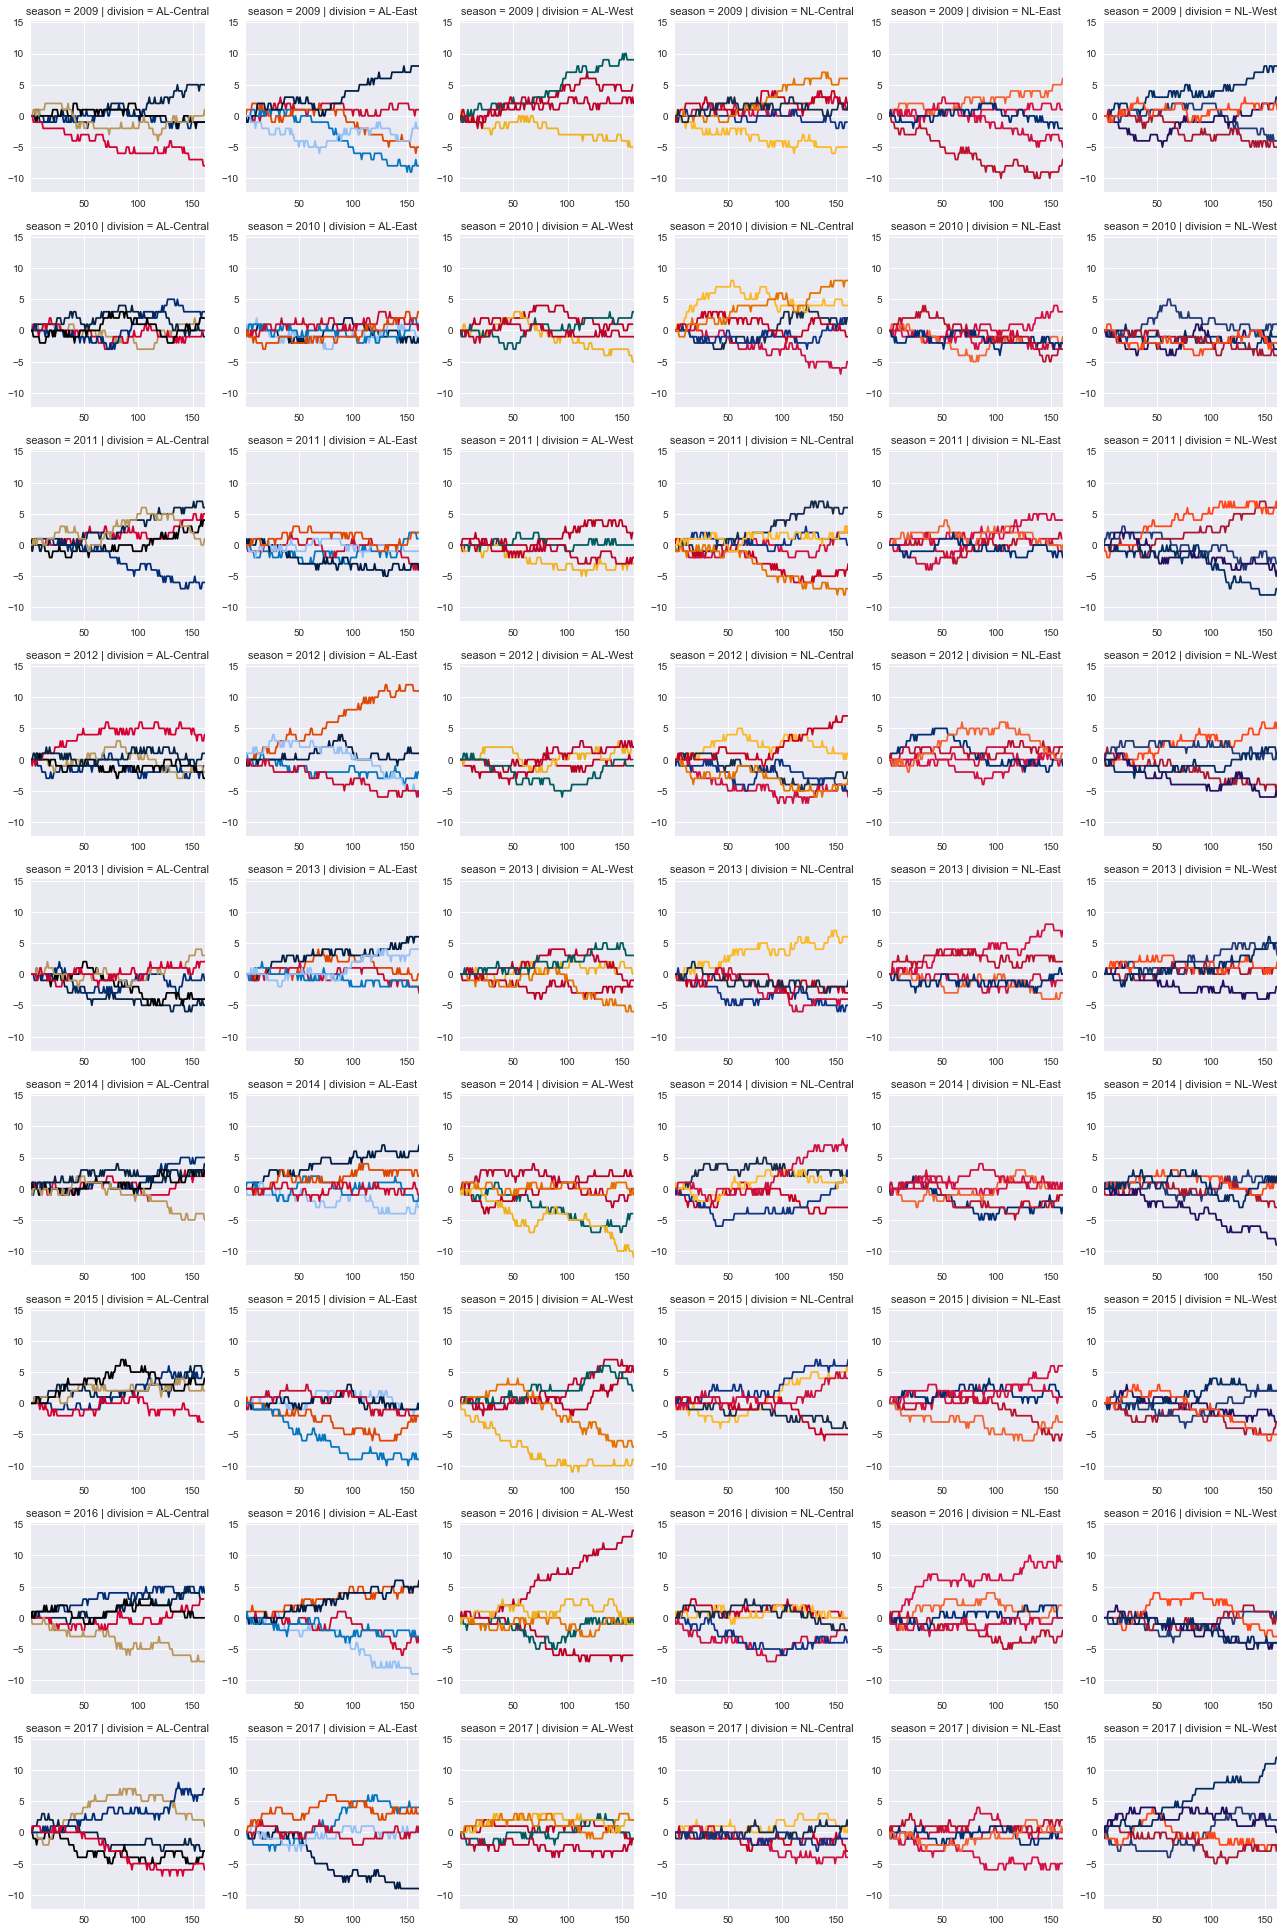

In [61]:
w_diff = sns.FacetGrid(records, col="division", row='season')
w_diff = w_diff.map_dataframe(sns.tsplot, time='games_played', value='win_difference', unit='division',
          condition='team', data=records, color=team_colors_dict)
plt.tight_layout()
plt.show()

C:\Users\mendo\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


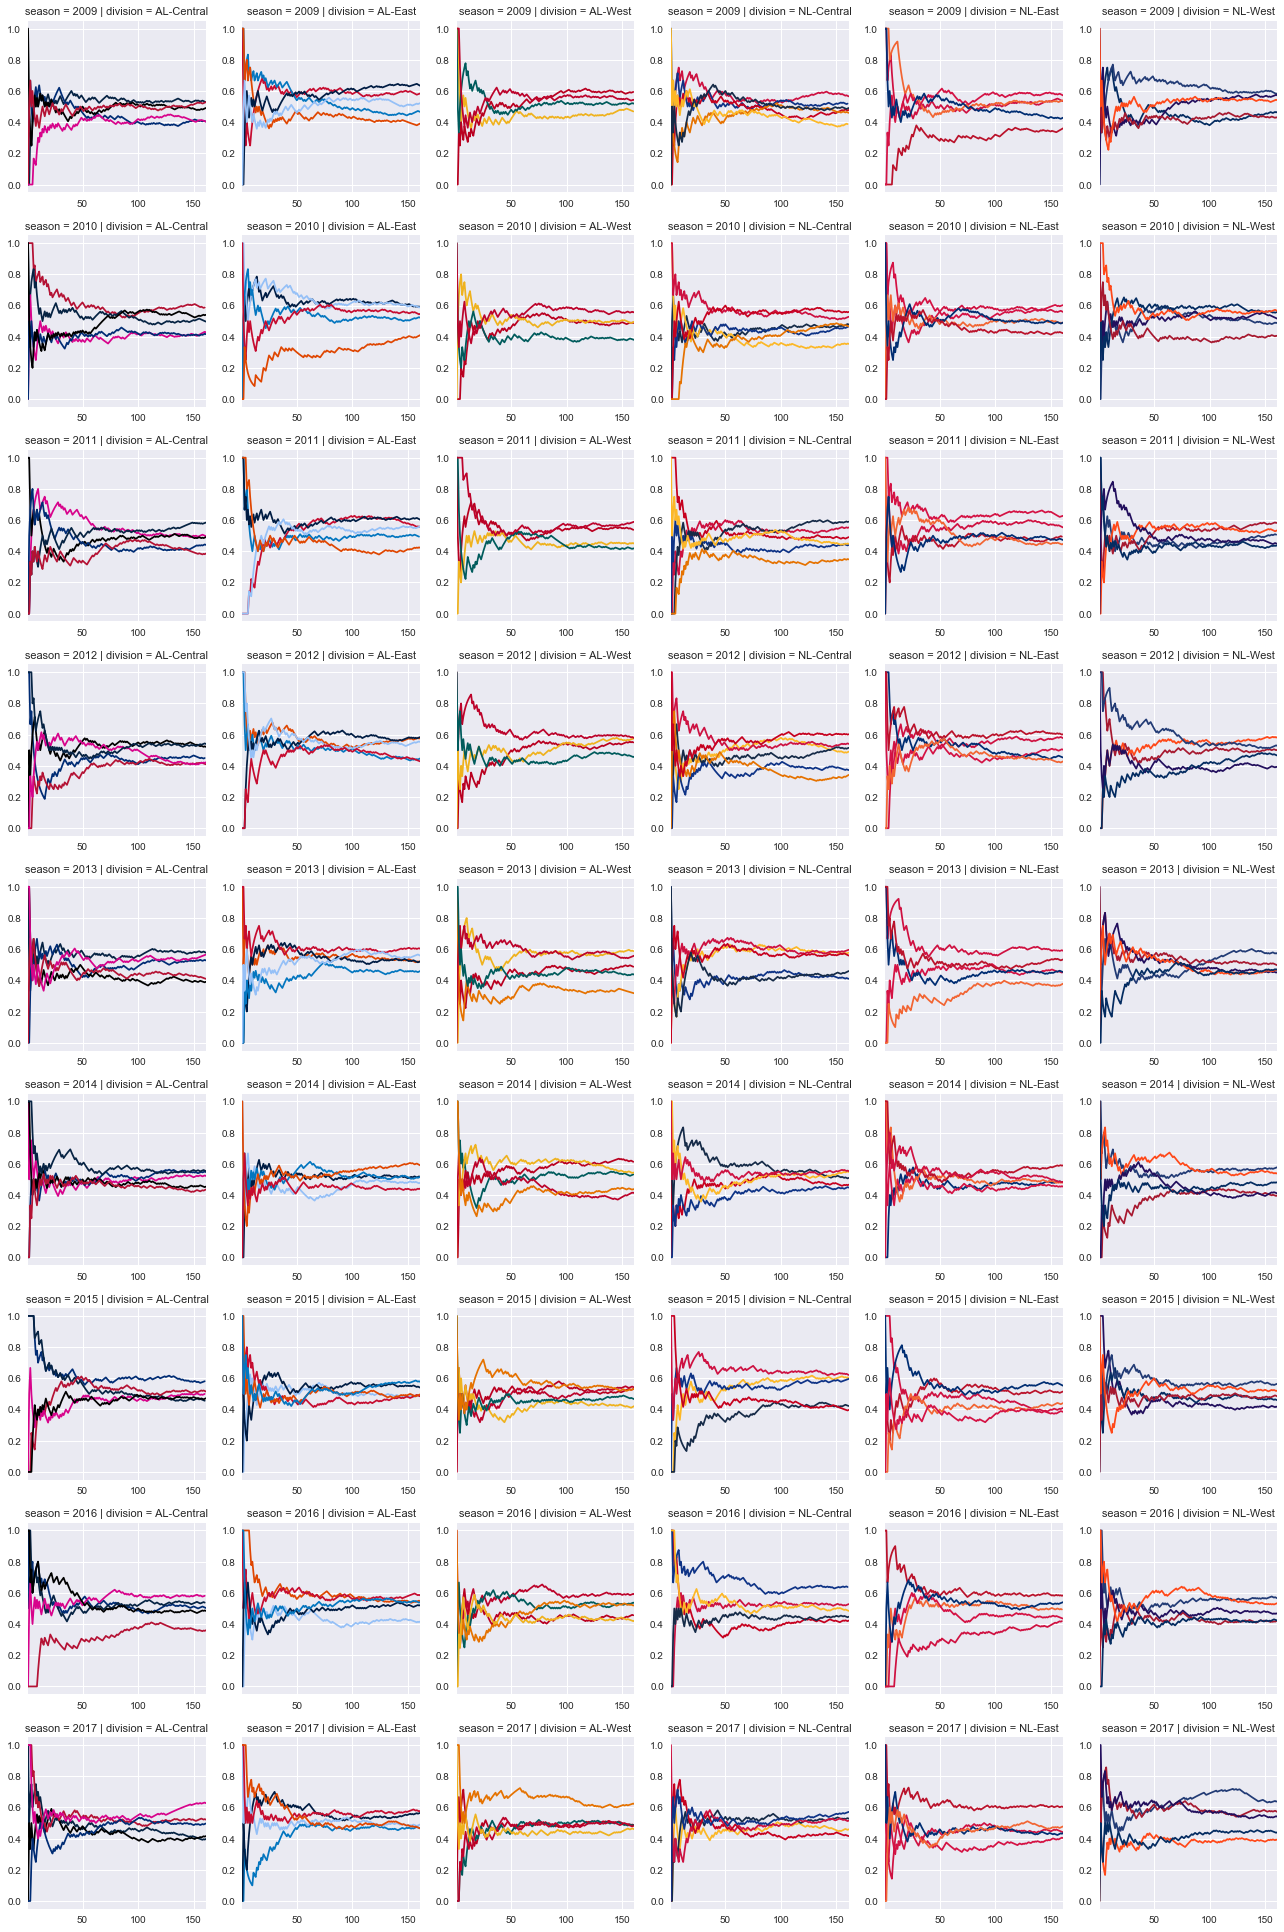

In [59]:
t_wins = sns.FacetGrid(records, col="division", row='season')
t_wins = t_wins.map_dataframe(sns.tsplot, time='games_played', value='win_percentage', unit='division',
          condition='team', data=records, color=team_colors_dict)
plt.tight_layout()
plt.show()

In [62]:
records

,game_id,team,r_wins,r_losses,r_runs_scored,r_runs_allowed,games,games_played,win_percentage,p_win_percentage,expected_wins,expected_losses,win_difference,home_,season,team_id,season_team,division
375,ANA200904210,DET,7,5,69,51,1,12,0.583333,0.634872,8.0,4.0,-1,False,2009,ANA200904210-DET,2009-DET,AL-Central
402,ANA200904220,DET,7,6,72,55,1,13,0.538462,0.620784,8.0,5.0,-1,False,2009,ANA200904220-DET,2009-DET,AL-Central
435,ANA200904230,DET,8,6,84,65,1,14,0.571429,0.615210,9.0,5.0,-1,False,2009,ANA200904230-DET,2009-DET,AL-Central
847,ANA200905080,KC,18,11,142,110,1,29,0.620690,0.614741,18.0,11.0,0,False,2009,ANA200905080-KC,2009-KC,AL-Central
877,ANA200905090,KC,18,12,143,114,1,30,0.600000,0.602229,18.0,12.0,0,False,2009,ANA200905090-KC,2009-KC,AL-Central
907,ANA200905100,KC,18,13,143,115,1,31,0.580645,0.598394,19.0,12.0,-1,False,2009,ANA200905100-KC,2009-KC,AL-Central
1310,ANA200905250,CWS,19,24,167,209,1,43,0.441860,0.398782,17.0,26.0,2,False,2009,ANA200905250-CWS,2009-CWS,AL-Central
1340,ANA200905260,CWS,20,24,184,212,1,44,0.454545,0.435555,19.0,25.0,1,False,2009,ANA200905260-CWS,2009-CWS,AL-Central
1371,ANA200905270,CWS,21,24,188,214,1,45,0.466667,0.441014,20.0,25.0,1,False,2009,ANA200905270-CWS,2009-CWS,AL-Central
2827,ANA200907230,MIN,48,47,461,444,1,95,0.505263,0.517183,49.0,46.0,-1,False,2009,ANA200907230-MIN,2009-MIN,AL-Central
